Files already downloaded and verified
Files already downloaded and verified


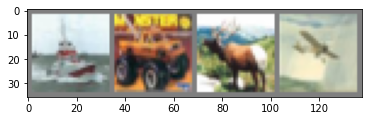

 ship truck  deer plane


C:\Users\sclab\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 2.194
[1,  4000] loss: 1.840
[1,  6000] loss: 1.699
[1,  8000] loss: 1.629
[1, 10000] loss: 1.564
[1, 12000] loss: 1.505
[2,  2000] loss: 1.411
[2,  4000] loss: 1.388
[2,  6000] loss: 1.383
[2,  8000] loss: 1.350
[2, 10000] loss: 1.328
[2, 12000] loss: 1.304
[3,  2000] loss: 1.250
[3,  4000] loss: 1.237
[3,  6000] loss: 1.241
[3,  8000] loss: 1.247
[3, 10000] loss: 1.203
[3, 12000] loss: 1.212
[4,  2000] loss: 1.128
[4,  4000] loss: 1.141
[4,  6000] loss: 1.125
[4,  8000] loss: 1.153
[4, 10000] loss: 1.145
[4, 12000] loss: 1.157
[5,  2000] loss: 1.050
[5,  4000] loss: 1.068
[5,  6000] loss: 1.083
[5,  8000] loss: 1.092
[5, 10000] loss: 1.090
[5, 12000] loss: 1.061
[6,  2000] loss: 0.983
[6,  4000] loss: 1.016
[6,  6000] loss: 1.008
[6,  8000] loss: 1.038
[6, 10000] loss: 1.030
[6, 12000] loss: 1.019
[7,  2000] loss: 0.949
[7,  4000] loss: 0.979
[7,  6000] loss: 0.979
[7,  8000] loss: 0.975
[7, 10000] loss: 0.985
[7, 12000] loss: 0.974
[8,  2000] loss: 0.891
[8,  4000] 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#데이터 불러오기, 학습여부 o
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

#학습용 셋은 섞어서 뽑기
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)

#데이터 불러오기, 학습여부 x
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

#테스트 셋은 굳이 섞을 필요가 없음
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

#클래스들
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#이미지 확인하기
def imshow(img):
    img = img / 2 + 0.5 # 정규화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습용 이미지 뽑기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

# 이미지별 라벨 (클래스) 보여주기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10): #데이터셋 10번 받기
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #입력 받기 (데이터 [입력, 라벨(정답)]으로 이루어짐)
        inputs, labels = data

        #학습
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 결과 출력
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000개마다
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

#여기에 학습한 모델 저장
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

#optimizer의 기울기를 0으로 만들기 (변화도가 누적되지 않게 하기 위해)
optimizer.zero_grad()
# output 구하기
outputs = net(inputs)
# loss 계산
loss = criterion(outputs, labels)
#backpropagation (기울기 계산)
loss.backward()
#업데이트
optimizer.step()

dataiter = iter(testloader)
images, labels = dataiter.next()

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
